,id,period,treatment,x1,x2,x3,x4,age,age_s,outcome,censored,eligible
,<int>,<int>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>
1,1,0,1,1,1.146148362,0,0.734203,36,0.08333333,0,0,1
2,1,1,1,1,0.002200337,0,0.734203,37,0.16666667,0,0,0
3,1,2,1,0,-0.481762418,0,0.734203,38,0.25000000,0,0,0
4,1,3,1,0,0.007872396,0,0.734203,39,0.33333333,0,0,0
5,1,4,1,1,0.216053715,0,0.734203,40,0.41666667,0,0,0
6,1,5,1,0,-0.057481504,0,0.734203,41,0.50000000,0,1,0


Trial Sequence Object 
Estimand: Per-protocol 
 
Data: 
 - N: 321 observations from 89 patients 
        id period treatment    x1           x2    x3        x4   age      age_s
     <int>  <int>     <num> <num>        <num> <int>     <num> <num>      <num>
  1:     1      0         1     1  1.146148362     0 0.7342030    36 0.08333333
  2:     1      1         1     1  0.002200337     0 0.7342030    37 0.16666667
 ---                                                                           
320:    99      1         1     0 -1.106480738     1 0.5752681    66 2.58333333
321:    99      2         0     0  1.650478074     1 0.5752681    67 2.66666667
     outcome censored eligible time_on_regime
       <num>    <int>    <num>          <num>
  1:       0        0        1              0
  2:       0        0        0              1
 ---                                         
320:       0        0        0              1
321:       0        0        0              2
 
IPW for informative

 - Numerator formula: 1 - censored ~ x2 
 - Denominator formula: 1 - censored ~ x2 + x1 
 - Numerator model is pooled across treatment arms. Denominator model is not pooled. 
 - Model fitter type: te_stats_glm_logit 
 - Weight models not fitted. Use calculate_weights() 

 - Numerator formula: treatment ~ age 
 - Denominator formula: treatment ~ age + x1 + x3 
 - Model fitter type: te_stats_glm_logit 
 - Weight models not fitted. Use calculate_weights() 

Weight Models for Informative Censoring
---------------------------------------

[[n]]
Model: P(censor_event = 0 | X) for numerator 
 
 term        estimate   std.error statistic p.value     
 (Intercept)  1.8536897 0.1672746 11.081715 1.538958e-28
 x2          -0.4746476 0.1719792 -2.759912 5.781689e-03
 
 null.deviance df.null logLik    AIC      BIC      deviance df.residual nobs
 256.5508      320     -124.3413 252.6825 260.2254 248.6825 319         321 
 
 path                                                                                                      
 /var/folders/0s/y3hcxq2x71j_djfnfp03zn140000gn/T//RtmpALdWXu/trial_pp/switch_models/model_76fa30138a4d.rds
 
[[d0]]
Model: P(censor_event = 0 | X, previous treatment = 0) for denominator 
 
 term        estimate   std.error statistic p.value     
 (Intercept)  1.0337903 0.2449150  4.221017 2.432028e-05
 x2          -0.6189556 0.2153087 -2.874735 4.043662e-03
 x1           0.9453986 0.4223668  2.238335 2.519919e-02
 
 null.d

Sequence of Trials Data: 
- Chunk size: 500 
- Censor at switch: TRUE 
- First period: 0 | Last period: Inf 
 
A TE Datastore Datatable object 
N: 500 observations 
        id trial_period followup_time outcome    weight treatment         x2
     <int>        <int>         <int>   <num>     <num>     <num>      <num>
  1:     1            0             0       0 1.0000000         1  1.1461484
  2:     1            0             1       0 0.8239493         1  1.1461484
 ---                                                                        
499:    99            0             0       0 1.0000000         1 -0.3463778
500:    99            0             1       0 0.9786170         1 -0.3463778
       age assigned_treatment
     <num>              <num>
  1:    36                  1
  2:    36                  1
 ---                         
499:    65                  1
500:    65                  1

- Formula: outcome ~ assigned_treatment + followup_time + I(followup_time^2) + trial_period + I(trial_period^2) + x2 + age 
- Treatment variable: assigned_treatment 
- Adjustment variables: x2 age 
- Model fitter type: te_stats_glm_logit 
 
Model Summary: 
 
 term               estimate std.error statistic p.value conf.low conf.high
 (Intercept)        -14.98   2.292      -6.54    6.3e-11 -19.47   -10.49   
 assigned_treatment  20.15   1.190      16.94    2.4e-64  17.82    22.48   
 followup_time      -18.54   1.506     -12.31    7.6e-35 -21.49   -15.59   
 I(followup_time^2)   1.10   0.087      12.58    2.8e-36   0.93     1.27   
 trial_period       -16.96   1.670     -10.16    3.0e-24 -20.23   -13.69   
 I(trial_period^2)    0.96   0.105       9.20    3.6e-20   0.76     1.17   
 x2                   1.20   1.592       0.76    4.5e-01  -1.92     4.32   
 age                 -0.29   0.091      -3.22    1.3e-03  -0.47    -0.11   
 
 null.deviance df.null logLik AIC  BIC  deviance df.res

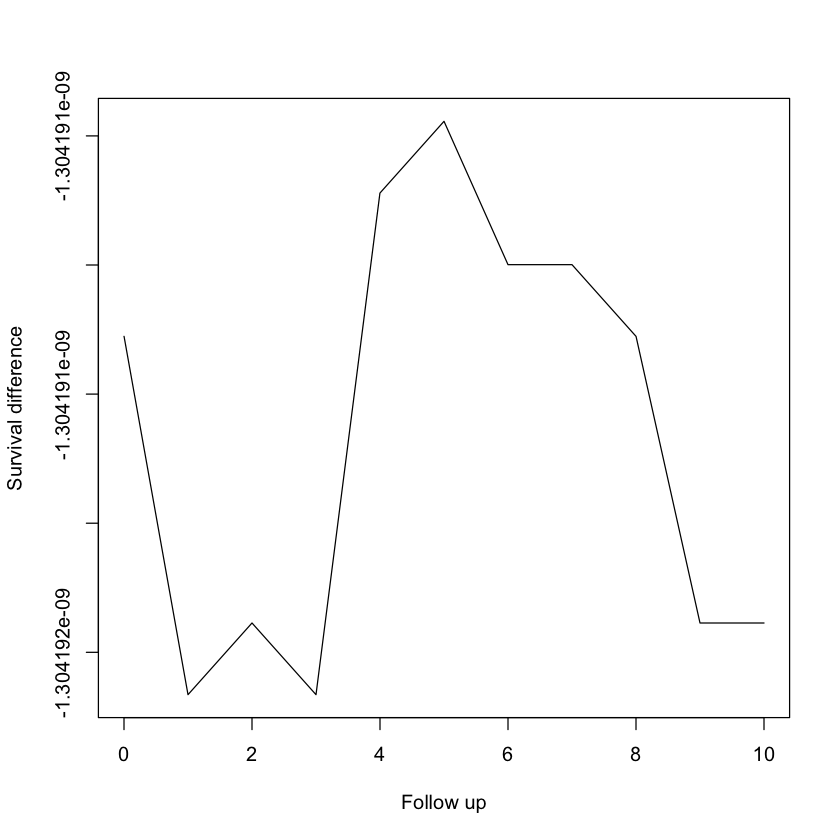

In [1]:
library(TrialEmulation)

# 1. Setup
options(warn = -1)
trial_pp <- trial_sequence(estimand = "PP")

trial_pp_dir  <- file.path(tempdir(), "trial_pp")
dir.create(trial_pp_dir)


# 2. Data preparation
# Load dummy dataset
data("data_censored") 

# Display first few rows
head(data_censored)

# Setting the observational data for the PP trial
trial_pp <- trial_pp |> set_data( 
  data      = data_censored,
  id        = "id",
  period    = "period",
  treatment = "treatment",
  outcome   = "outcome",
  eligible  = "eligible"
)

# Display trial sequence object
trial_pp


# 3. Weight models and censoring
trial_pp <- trial_pp |> set_censor_weight_model(
  censor_event = "censored",
  numerator    = ~x2,
  denominator  = ~ x2 + x1,
  pool_models  = "numerator",
  model_fitter = stats_glm_logit(save_path = file.path(trial_pp_dir, "switch_models"))
)
trial_pp@censor_weights

#3.1 Censoring due to treatment switching
trial_pp <- trial_pp |>
  set_switch_weight_model(
    numerator    = ~ age,
    denominator  = ~ age + x1 + x3,
    model_fitter = stats_glm_logit(save_path = file.path(trial_pp_dir, "switch_models"))
  )
trial_pp@switch_weights

##  - Numerator formula: treatment ~ age 
##  - Denominator formula: treatment ~ age + x1 + x3 
##  - Model fitter type: te_stats_glm_logit 
##  - Weight models not fitted. Use calculate_weights()


# 4. Calculate Weights
trial_pp <- trial_pp |> calculate_weights()

show_weight_models(trial_pp)


# 5. Specify Outcome Model
trial_pp <- set_outcome_model(trial_pp)


# 6. Expand Trials
trial_pp <- set_expansion_options(
  trial_pp,
  output     = save_to_datatable(),
  chunk_size = 500
)

# 6.1 Create Sequence of Trials Data
trial_pp <- expand_trials(trial_pp)
trial_pp@expansion


# 7. Load or Sample from Expanded Data
trial_pp <- load_expanded_data(trial_pp, seed = 1234, p_control = 0.5)


# 8. Fit Marginal Structural Model
trial_pp <- fit_msm(
  trial_pp,
  weight_cols    = c("weight", "sample_weight"),
  modify_weights = function(w) {
    q99 <- quantile(w, probs = 0.99)
    pmin(w, q99)
  }
)

# Model summary
trial_pp@outcome_model


# 9. Inference
preds <- predict(
  trial_pp,
  newdata       = outcome_data(trial_pp)[trial_period == 1, ],
  predict_times = 0:10,
  type          = "survival"
)

plot(preds$difference$followup_time, preds$difference$survival_diff,
  type = "l", xlab = "Follow up", ylab = "Survival difference")
lines(preds$difference$followup_time, preds$difference$`2.5%`, type = "l", col = "red", lty = 2)
lines(preds$difference$followup_time, preds$difference$`97.5%`, type = "l", col = "red", lty = 2)
